In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', family='NanumBarunGothic')

#### data 불러오기

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종60대.pkl')

In [6]:
# 사용하지 않을 변수 제거
df.drop(['카드_총_이용금액', '카드_총_이용건수', '카드_평일_이용건수','카드_여행사_이용건수'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      143 non-null    object 
 1   농촌마을_수        143 non-null    int64  
 2   농촌마을_체험_평균등급  143 non-null    float64
 3   농촌마을_교육_평균등급  143 non-null    float64
 4   농촌마을_숙박_평균등급  143 non-null    float64
 5   농촌마을_음식_평균등급  143 non-null    float64
 6   농촌마을_으뜸촌_선정수  143 non-null    int64  
 7   카드_관광쇼핑_이용건수  123 non-null    float64
 8   카드_교통_이용건수    113 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    142 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          142 non-null    float64
 13  문화유산          142 non-null    float64
 14  교통            142 non-null    float64
 15  숙박시설          115 non-null    float64
 16  식당및음식         142 non-null    float64
 17  쇼핑            140 non-null    float64
 18  관광지편의시설       142 non-null    

#### 결측치 처리

In [8]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    20
카드_교통_이용건수      30
카드_숙박_이용건수       1
카드_체험_이용건수       1
카드_주말_이용건수       1
자연경관             1
문화유산             1
교통               1
숙박시설            28
식당및음식            1
쇼핑               3
관광지편의시설          1
관광종사자의친절성        1
체험프로그램           5
관광지물가            1
관광지혼잡도           1
재방문의도            1
타인추천의도           1
평균인당비용           1
여행객수             1
dtype: int64

In [9]:
# 뒤 부분 모두 null인 데이터 => 우선 제거하기
df[df['여행객수'].isnull()]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
66,경북 울주군,1,3.0,1.996,3.0,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(df[df['여행객수'].isnull()].index, axis=0).reset_index(drop=True)

In [11]:
# 다시 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    19
카드_교통_이용건수      29
카드_숙박_이용건수       0
카드_체험_이용건수       0
카드_주말_이용건수       0
자연경관             0
문화유산             0
교통               0
숙박시설            27
식당및음식            0
쇼핑               2
관광지편의시설          0
관광종사자의친절성        0
체험프로그램           4
관광지물가            0
관광지혼잡도           0
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [12]:
# 이용건수는 0으로
for i in range(12):
  df.iloc[:, i] = df.iloc[:, i].fillna(0)

In [13]:
# 만족도는 평균값으로
for i in range(12, 26):
  df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].mean())

#### 변수별 분포 확인

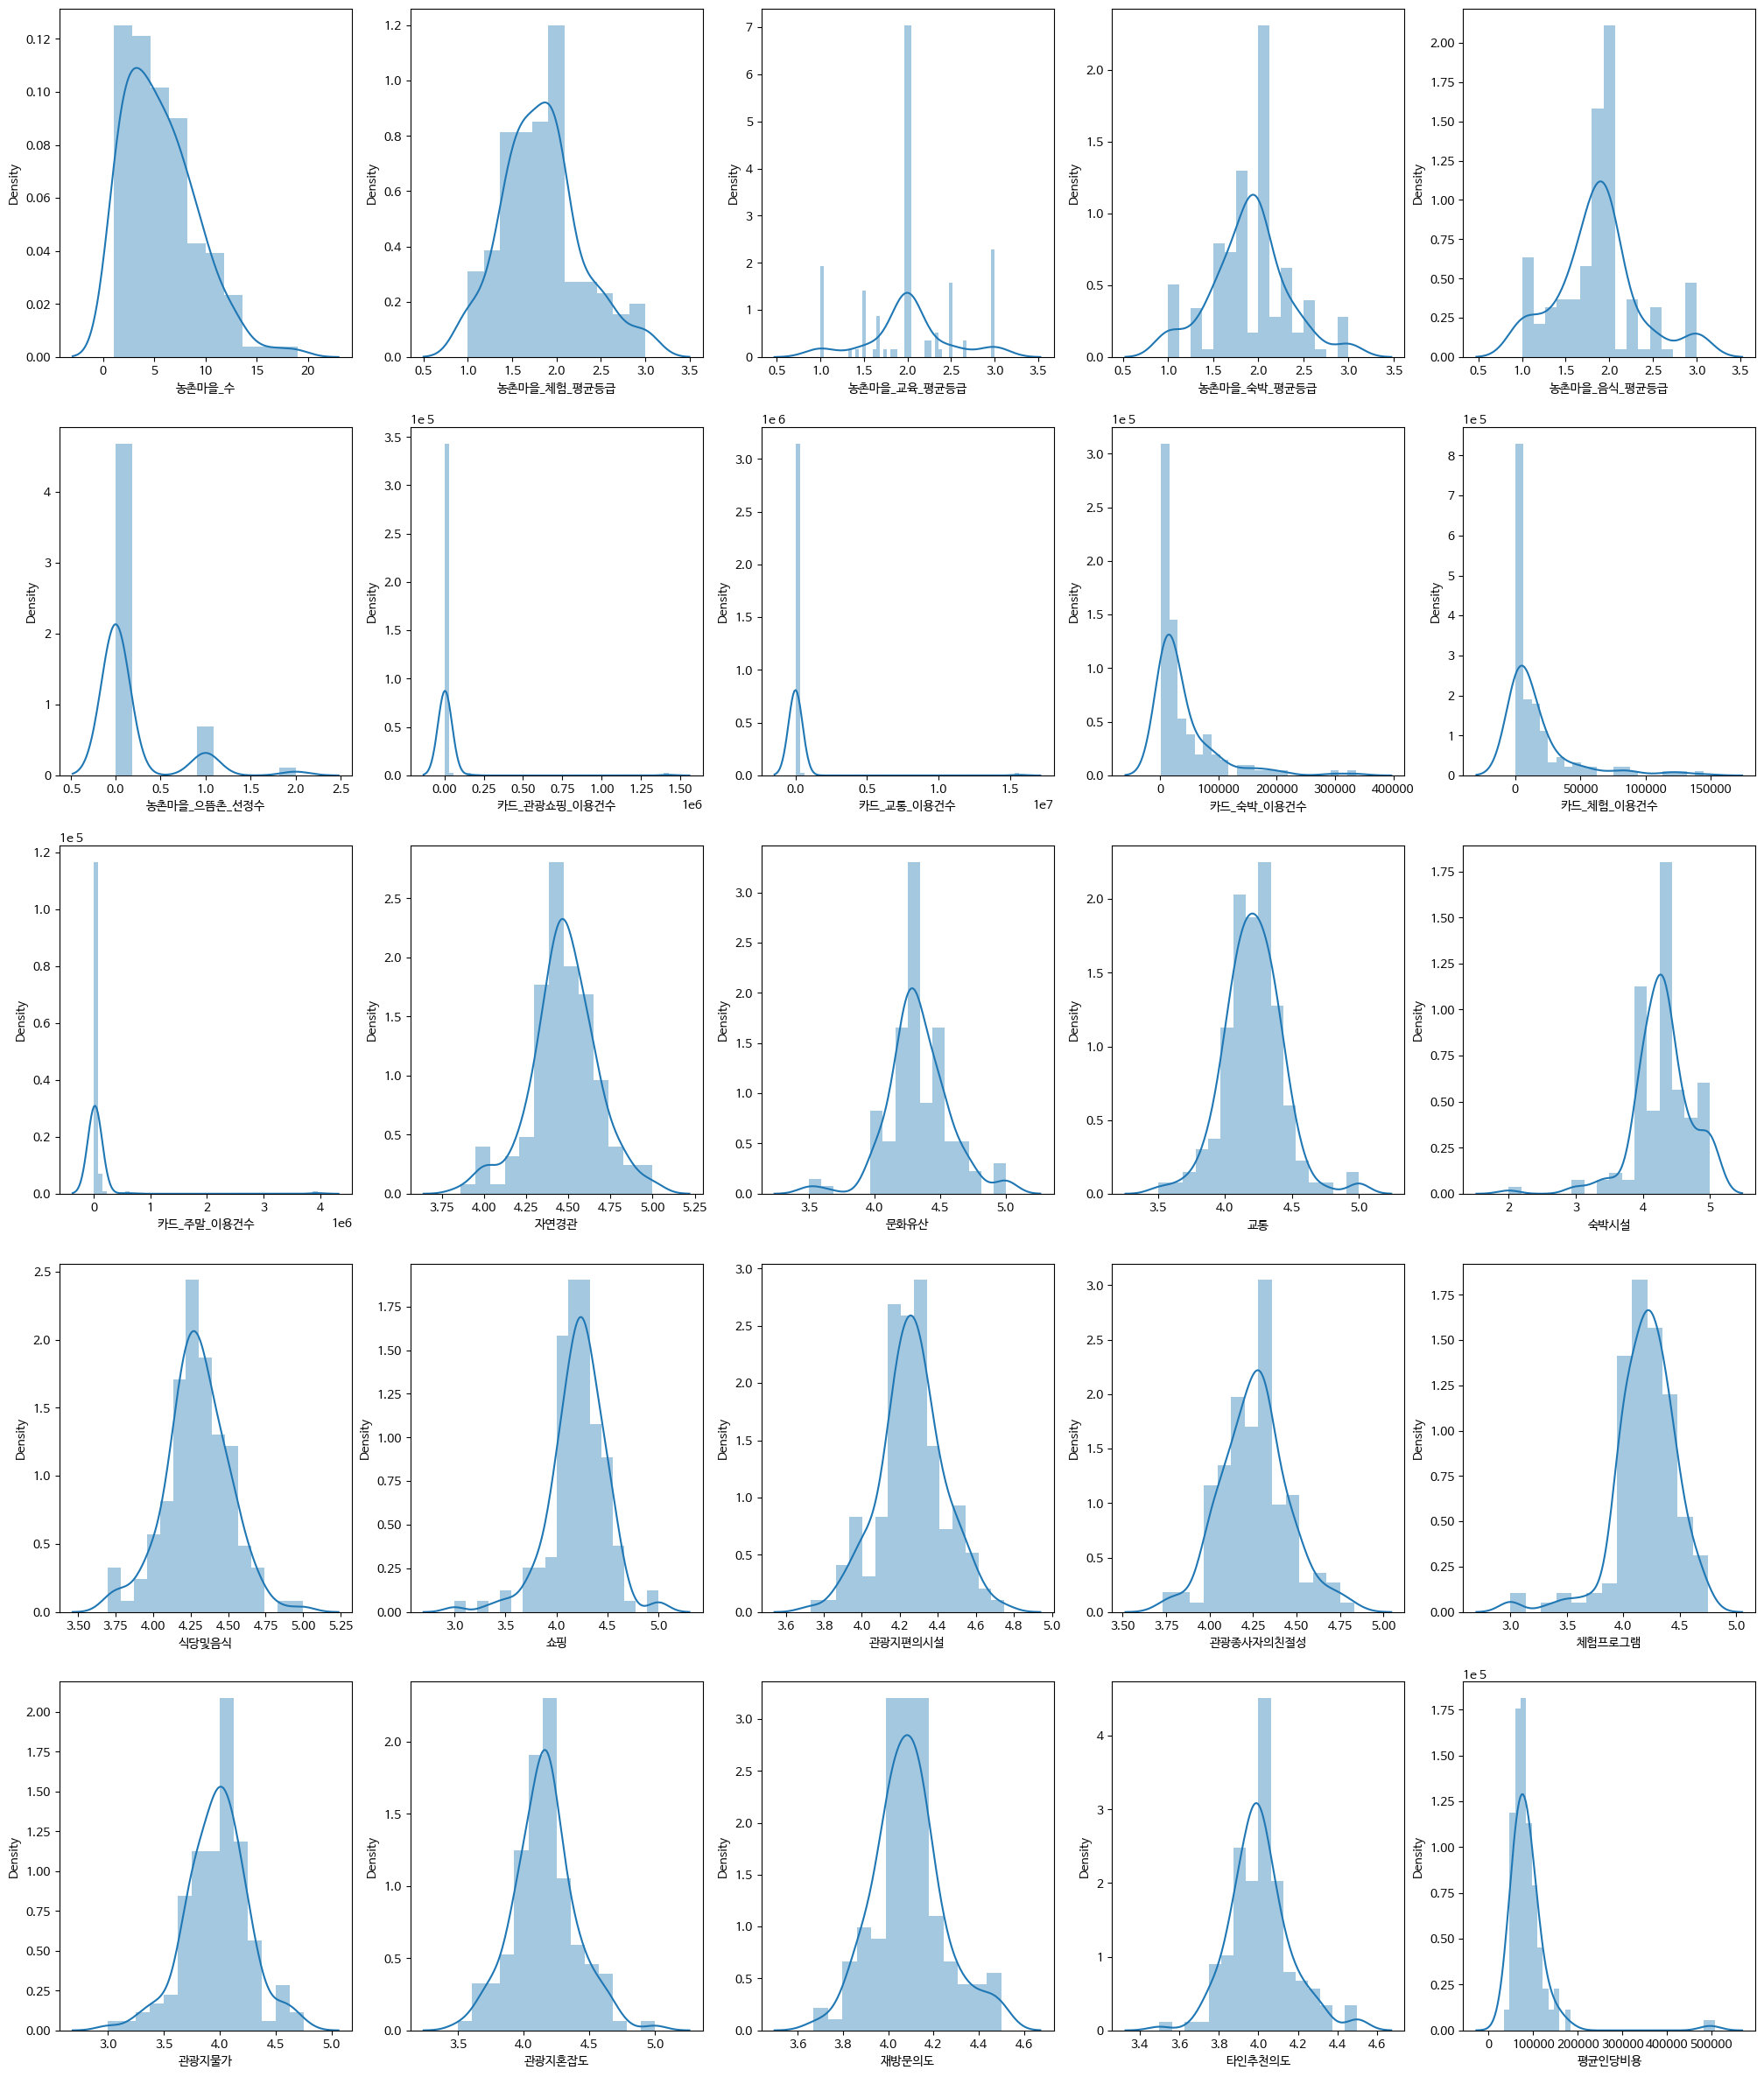

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df.iloc[:, idx+1], ax=ax)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      142 non-null    object 
 1   농촌마을_수        142 non-null    int64  
 2   농촌마을_체험_평균등급  142 non-null    float64
 3   농촌마을_교육_평균등급  142 non-null    float64
 4   농촌마을_숙박_평균등급  142 non-null    float64
 5   농촌마을_음식_평균등급  142 non-null    float64
 6   농촌마을_으뜸촌_선정수  142 non-null    int64  
 7   카드_관광쇼핑_이용건수  142 non-null    float64
 8   카드_교통_이용건수    142 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    142 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          142 non-null    float64
 13  문화유산          142 non-null    float64
 14  교통            142 non-null    float64
 15  숙박시설          142 non-null    float64
 16  식당및음식         142 non-null    float64
 17  쇼핑            142 non-null    float64
 18  관광지편의시설       142 non-null    

#### 편차 큰 컬럼 - 로그변환

In [16]:
# 카드 관련 컬럼 로그변환하기
df_log = df.copy()
df_log.iloc[:, 7:12] = np.log1p(df_log.iloc[:, 7:12])
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

#### 로그변환 + 모든변수 표준 scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
df_scaled = df_log.copy()
scaler = StandardScaler()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [19]:
df_scaled

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,1.782666,-0.945201,0.676929,-0.940105,-0.653979,-0.395413,1.150686,1.135135,1.840289,...,-0.162456,-0.017452,-0.464419,0.532381,-0.631531,-1.180775,0.000000,-0.307153,1.339139,990824.1
1,강원 고성군,-1.017540,0.363755,2.094203,0.237514,0.293798,-0.395413,0.920737,-0.664872,1.783646,...,-0.346469,-0.076458,-0.464419,-0.094295,-0.203817,0.050844,-0.065192,0.472860,0.505196,96283.5
2,강원 동해시,-1.017540,0.363755,-0.030646,-2.117725,-0.081898,-0.395413,0.345105,1.008427,0.812529,...,-0.015247,0.218569,-0.568602,-0.942151,-0.595888,0.220722,-1.369028,-0.242152,1.191026,247533.3
3,강원 삼척시,0.942605,-0.197547,-0.030646,-0.436084,0.293798,-0.395413,0.992092,0.276328,1.157252,...,1.236036,1.988727,0.577406,0.421791,0.509040,0.687888,0.521534,0.212856,0.477550,424285.5
4,강원 속초시,-1.297560,0.363755,-0.039145,-0.092219,-0.081898,-0.395413,0.861299,1.991108,1.637828,...,-0.788098,-0.548500,-0.620693,-0.204885,-0.061245,-0.543731,-0.065192,0.277857,1.665732,879832.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,충북 제천시,0.382563,-0.278374,2.094203,-0.155811,-0.239861,-0.395413,0.767216,-0.106346,0.746282,...,-0.493678,-0.371484,-0.933240,-0.094295,-0.916674,-0.161504,-0.325959,-0.307153,0.626407,251315.6
138,충북 증평군,-0.457498,0.363755,-0.030646,0.237514,-0.417035,-0.395413,-0.214490,0.331430,-0.976235,...,-2.628220,0.395585,-1.349970,1.748870,0.081326,0.730358,-0.586726,-0.047149,-0.078688,18718.2
139,충북 진천군,-1.017540,-0.758849,-0.039145,-0.940105,0.293798,-0.395413,-0.306969,-0.716578,-0.171421,...,-3.253861,-1.551590,-2.235521,0.200611,-0.952317,-1.902758,-0.586726,-1.672177,-0.940230,51242.1
140,충북 청주시,-0.177478,0.925057,-0.030646,1.650658,2.428430,-0.395413,1.282144,0.751331,1.415307,...,-0.493678,0.159564,-0.360237,-0.426065,0.615969,-0.543731,-0.782302,-1.412173,-0.270057,262278.2


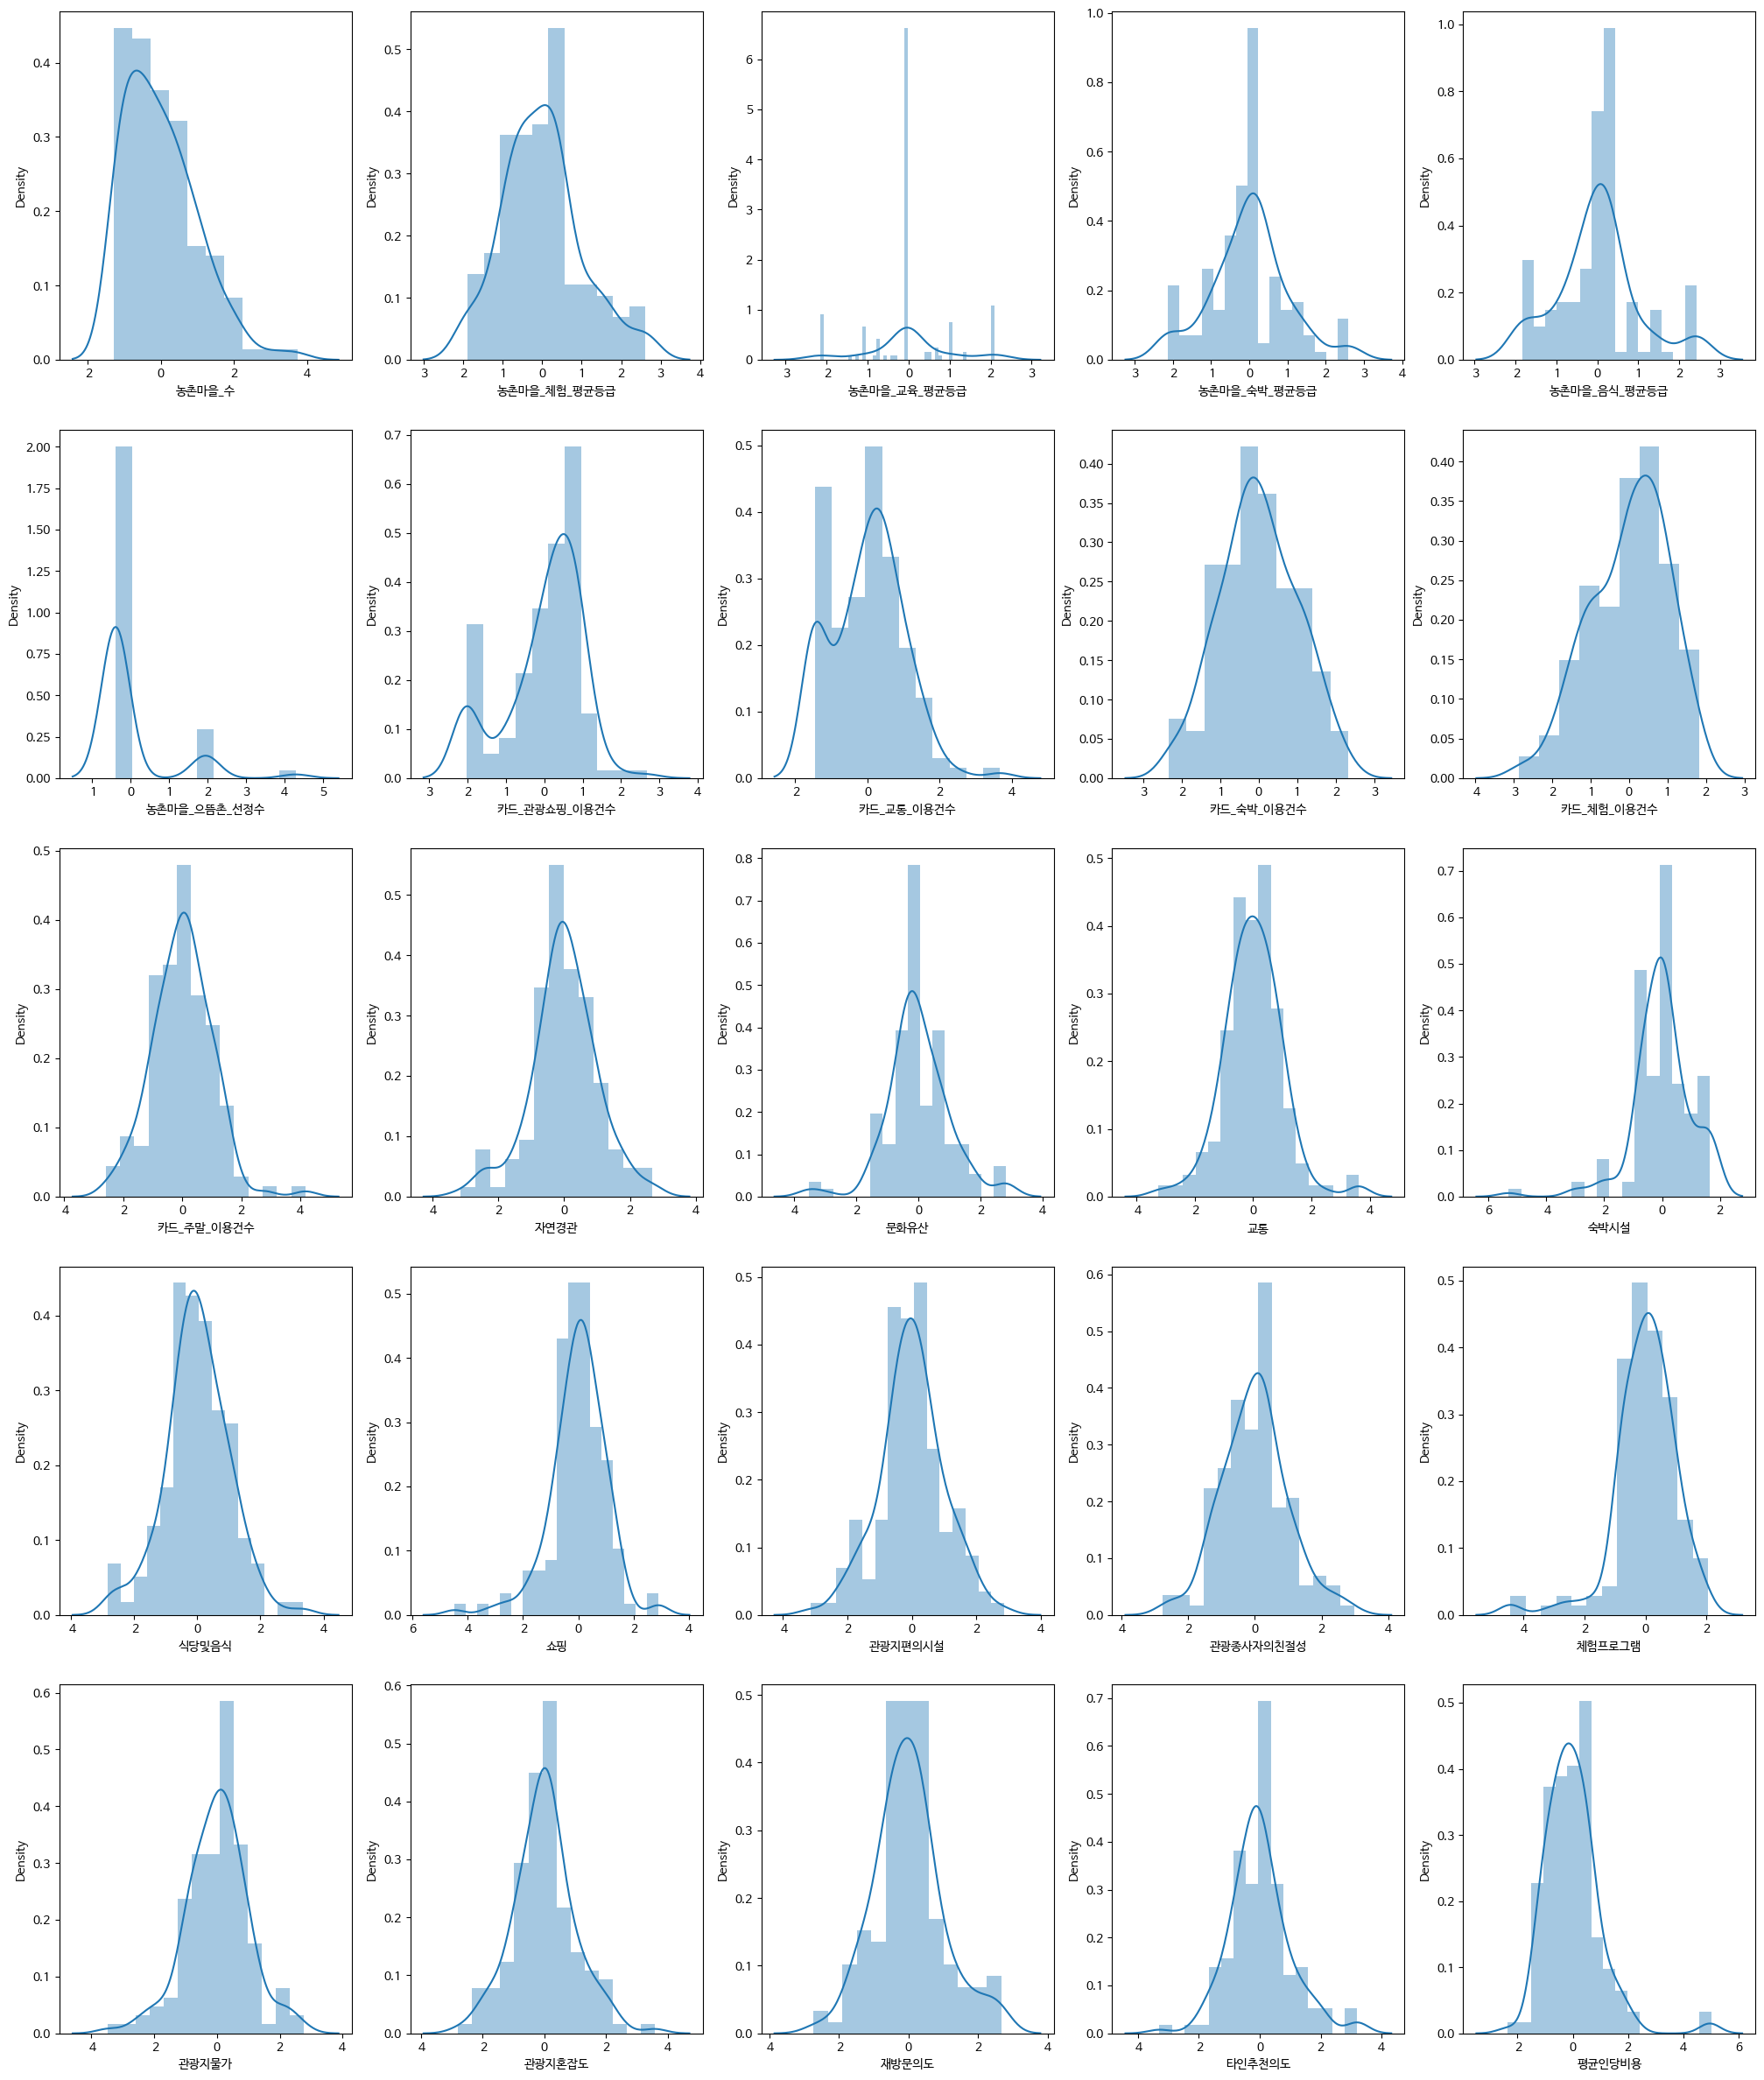

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df_scaled.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df_scaled.iloc[:, idx+1], ax=ax)
plt.show()

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
res = ols('여행객수~' + '+'.join(df_scaled.iloc[:, 1:-1].columns), data=df_scaled.iloc[:, 1:]).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     5.591
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           6.13e-11
Time:                        14:41:05   Log-Likelihood:                -1896.3
No. Observations:                 142   AIC:                             3845.
Df Residuals:                     116   BIC:                             3921.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.575e+05   1.42e+04     18.174      0.000    2.29e+05    2.86e+05
농촌마을_수         119.3341   1.75e+04      0.007      0.995   -3.46e+04    3.48e+04
농촌마을_체험_평균등급  2.294e+04   1.77e+04      1.292      0.199   -1.22e+04    5.81e+04
농촌마을_교육_평균등급 -1.867e+04   1.63e+04     -1.148      0.253   -5.09e+04    1.35e+04
농촌마을_숙박_평균등급 -4825.0648   1.82e+04     -0.265      0.792   -4.09e+04    3.13e+04
농촌마을_음식_평균등급  1455.0357   1.69e+04      0.086      0.931    -3.2e+04    3.49e+04
농촌마을_으뜸촌_선정수  2.424e+04   1.92e+04      1.265      0.208   -1.37e+04    6.22e+04
카드_관광쇼핑_이용건수  4.317e+04   2.09e+04      2.062      0.041    1713.425    8.46e+04
카드_교통_이용건수    2.882e+04   2.01e+04      1.436      0.154   -1.09e+04    6.86e+04
카드_숙박_이용건수    2.004e+04   3.09e+04      0.649      0.518   -4.11e+04    8.12e+04
카드_체험_이용건수    4.145e+04   2.38e+04      1.740      0.085   -5736.752    8.86e+04
카드_주말_이용건수    3.104e+04   4.14e+04      0.749      0.455    -5.1e+04    1.13e+05
자연경관          4.333e+04    1.7e+04      2.548      0.012    9652.289     7.7e+04
문화유산         -2.146e+04   1.66e+04     -1.294      0.198   -5.43e+04    1.14e+04
교통           -1.895e+04    2.1e+04     -0.903      0.369   -6.05e+04    2.26e+04
숙박시설         -1.355e+04   1.54e+04     -0.878      0.382   -4.41e+04     1.7e+04
식당및음식         -4.11e+04   1.88e+04     -2.180      0.031   -7.84e+04   -3764.229
쇼핑            2207.6431   1.77e+04      0.125      0.901   -3.29e+04    3.73e+04
관광지편의시설       1.095e+04   1.99e+04      0.551      0.583   -2.84e+04    5.03e+04
관광종사자의친절성    -6342.2674   2.19e+04     -0.289      0.773   -4.98e+04    3.71e+04
체험프로그램        1.763e+04   1.59e+04      1.111      0.269   -1.38e+04    4.91e+04
관광지물가         3.495e+04   2.21e+04      1.585      0.116   -8726.682    7.86e+04
관광지혼잡도        -2.19e+04   2.05e+04     -1.070      0.287   -6.24e+04    1.87e+04
재방문의도         6723.5818   2.09e+04      0.322      0.748   -3.46e+04    4.81e+04
타인추천의도        2.578e+04   1.93e+04      1.336      0.184   -1.24e+04     6.4e+04
평균인당비용        4.513e+04    1.9e+04      2.378      0.019    7539.119    8.27e+04
==============================================================================
Omnibus:                        5.733   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.267
Skew:                           0.446   Prob(JB):                       0.0718
Kurtosis:                       3.307   Cond. No.                         7.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_scaled.iloc[:,1:-1].values, i) for i in range(df_scaled.iloc[:,1:-1].shape[1])]
vif['features'] = df_scaled.iloc[:,1:-1].columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.186710,숙박시설
1,1.254418,체험프로그램
2,1.318660,농촌마을_교육_평균등급
3,1.370569,문화유산
4,1.421499,농촌마을_음식_평균등급
5,1.440512,자연경관
6,1.528809,농촌마을_수
7,1.561390,쇼핑
8,1.569311,농촌마을_체험_평균등급
9,1.657413,농촌마을_숙박_평균등급


### 단계별 선택법

In [23]:
## 전진 단계별 선택법
import statsmodels.api as sm
variables = df_scaled.columns[1:-1].tolist() ## 설명 변수 리스트

y = df_scaled['여행객수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [24]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df_scaled[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_scaled[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_scaled[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [25]:
selected_variables

['카드_숙박_이용건수',
 '카드_체험_이용건수',
 '평균인당비용',
 '자연경관',
 '카드_관광쇼핑_이용건수',
 '식당및음식',
 '관광지물가']

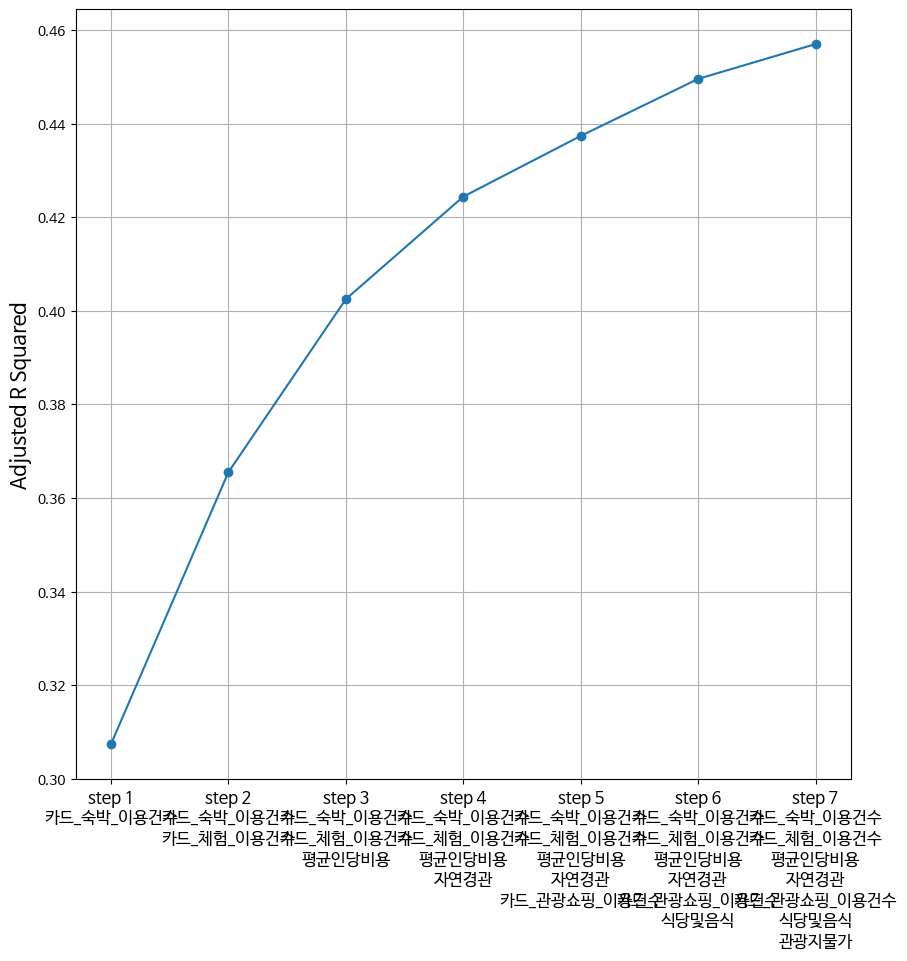

In [26]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 최종으로 회귀분석

In [27]:
selected_variables

['카드_숙박_이용건수',
 '카드_체험_이용건수',
 '평균인당비용',
 '자연경관',
 '카드_관광쇼핑_이용건수',
 '식당및음식',
 '관광지물가']

In [28]:
df_final = df_scaled[selected_variables + ['여행객수']]
df_final

,카드_숙박_이용건수,카드_체험_이용건수,평균인당비용,자연경관,카드_관광쇼핑_이용건수,식당및음식,관광지물가,여행객수
0,1.840289,0.756444,1.339139,0.229847,1.150686,-0.166651,-0.631531,990824.1
1,1.783646,-1.676472,0.505196,0.127693,0.920737,-0.214266,-0.203817,96283.5
2,0.812529,-1.149221,1.191026,-0.280925,0.345105,0.166651,-0.595888,247533.3
3,1.157252,-0.790250,0.477550,0.740619,0.992092,1.071330,0.509040,424285.5
4,1.637828,1.035026,1.665732,-0.076616,0.861299,-0.642798,-0.061245,879832.5
...,...,...,...,...,...,...,...,...
137,0.746282,1.354901,0.626407,-0.587388,0.767216,-0.261881,-0.916674,251315.6
138,-0.976235,0.716593,-0.078688,-0.740619,-0.214490,1.785550,0.081326,18718.2
139,-0.171421,-1.525950,-0.940230,-2.426167,-0.306969,-0.833257,-0.952317,51242.1
140,1.415307,0.611463,-0.270057,-0.791696,1.282144,-0.261881,0.615969,262278.2


In [29]:
res = ols('여행객수~' + '+'.join(df_final.iloc[:, :-1].columns), data=df_final).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     17.95
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.12e-16
Time:                        14:41:07   Log-Likelihood:                -1905.5
No. Observations:                 142   AIC:                             3827.
Df Residuals:                     134   BIC:                             3851.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.575e+05   1.41e+04     18.312      0.000     2.3e+05    2.85e+05
카드_숙박_이용건수    5.234e+04   2.07e+04      2.530      0.013    1.14e+04    9.33e+04
카드_체험_이용건수     5.28e+04   1.76e+04      3.001      0.003     1.8e+04    8.76e+04
평균인당비용        5.245e+04   1.69e+04      3.109      0.002    1.91e+04    8.58e+04
자연경관          4.586e+04    1.5e+04      3.060      0.003    1.62e+04    7.55e+04
카드_관광쇼핑_이용건수  4.617e+04   1.86e+04      2.484      0.014    9403.300    8.29e+04
식당및음식        -4.114e+04   1.62e+04     -2.541      0.012   -7.32e+04   -9115.119
관광지물가         2.713e+04   1.61e+04      1.688      0.094   -4651.094    5.89e+04
==============================================================================
Omnibus:                       10.723   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.193
Skew:                           0.581   Prob(JB):                      0.00371
Kurtosis:                       3.736   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
selected_variables.sort()
selected_variables

['관광지물가',
 '식당및음식',
 '자연경관',
 '카드_관광쇼핑_이용건수',
 '카드_숙박_이용건수',
 '카드_체험_이용건수',
 '평균인당비용']